In [4]:
import pandas as pd

In [5]:
from nsepy import get_history as gh
import datetime as dt

In [6]:
import pandas as pd
import datetime as dt
import kagglehub
import os

# Load the dataset
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
df = pd.read_csv(os.path.join(path, "Microsoft_Stock.csv"))
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Auto-select 150 days around the midpoint
mid_date = df['Date'].min() + (df['Date'].max() - df['Date'].min()) / 2
start = mid_date - pd.Timedelta(days=75)
end = mid_date + pd.Timedelta(days=75)

stk_data = df[(df['Date'] >= start) & (df['Date'] <= end)]
stk_data.set_index('Date', inplace=True)

print(f"Selected 150-day range: {start.date()} → {end.date()}")
print(f"Total rows: {len(stk_data)}")
print(stk_data.head())


Selected 150-day range: 2018-01-16 → 2018-06-15
Total rows: 105
                      Open   High    Low  Close    Volume
Date                                                     
2018-01-16 16:00:00  90.10  90.79  88.01  88.35  36599736
2018-01-17 16:00:00  89.08  90.28  88.75  90.14  25621164
2018-01-18 16:00:00  89.80  90.67  89.66  90.10  24159683
2018-01-19 16:00:00  90.14  90.61  89.66  90.00  36875013
2018-01-22 16:00:00  90.00  91.62  89.74  91.61  23601555


In [7]:
stk_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-16 16:00:00,90.10,90.79,88.01,88.35,36599736
2018-01-17 16:00:00,89.08,90.28,88.75,90.14,25621164
2018-01-18 16:00:00,89.80,90.67,89.66,90.10,24159683
2018-01-19 16:00:00,90.14,90.61,89.66,90.00,36875013
2018-01-22 16:00:00,90.00,91.62,89.74,91.61,23601555
...,...,...,...,...,...
2018-06-08 16:00:00,101.09,101.95,100.54,101.63,22165128
2018-06-11 16:00:00,101.37,101.59,100.67,101.05,23490894
2018-06-12 16:00:00,101.10,101.45,100.75,101.31,18325228


In [8]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (105, 1)


In [10]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [11]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found

RMSE-Testset: 0.5671390709153978
maPe-Testset: 0.9904761904761905
RMSE-Testset: 0.3159705525365988
maPe-Testset: 2702110703390.3887
RMSE-Testset: 0.09380593618196292
maPe-Testset: 10740612424445.79
RMSE-Testset: 0.0901286045680312
maPe-Testset: 12170055968319.2


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


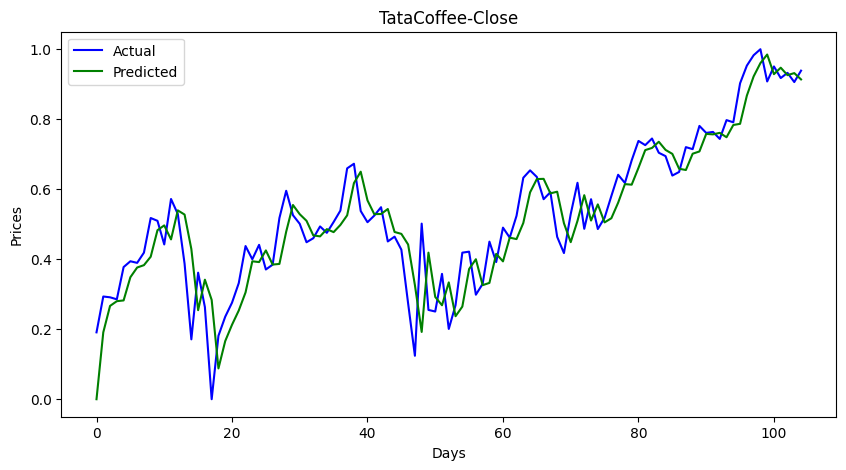

In [12]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [14]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

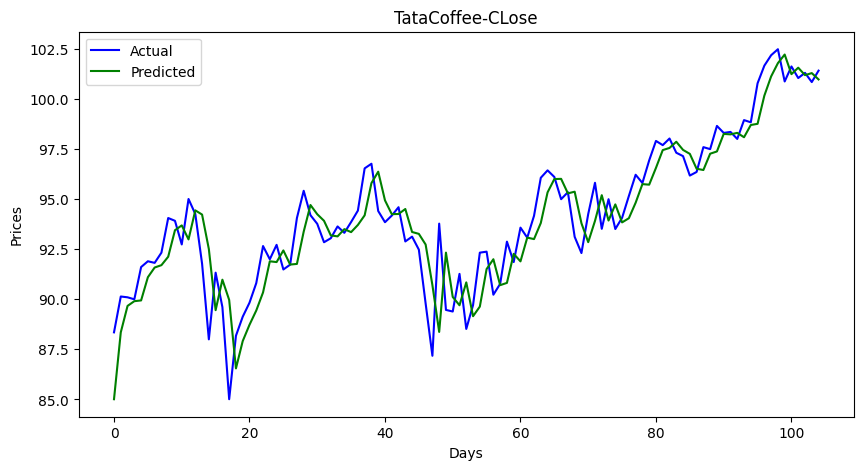

In [16]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [17]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)


RMSE-Testset: 1.5754480078491844
maPe-Testset: 0.012734606170135093


C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [20]:
forecast

array([0.93237014, 0.93144261])

In [21]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [22]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [23]:
forecast_stock_price_test_oriF

,Closefore
0,101.30783
1,101.291617
